### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
index = pd.read_csv('../data/raw/sandp500.csv', parse_dates=True)

In [25]:
index.head()

,SERIES_ID,DATE,VAL
0,SP500,2019-01-01,0.00
1,SP500,2019-01-02,2510.03
2,SP500,2019-01-03,2447.89
3,SP500,2019-01-04,2531.94
4,SP500,2019-01-07,2549.69


- this data set is missing indexes over the weekend.
- it also has zeros on holidays.
- need to fill this in 
- referencing [this](https://towardsdatascience.com/filling-gaps-in-time-series-data-2db7366f1965)

In [26]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SERIES_ID  860 non-null    object 
 1   DATE       860 non-null    object 
 2   VAL        860 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.3+ KB


In [27]:
# copy df
index_df = index.copy()

In [28]:
# fix date
index_df['DATE'] = pd.to_datetime(index_df['DATE'] )

In [11]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SERIES_ID  860 non-null    object        
 1   DATE       860 non-null    datetime64[ns]
 2   VAL        860 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.3+ KB


### Set index to date

In [29]:
date_df = index_df.set_index('DATE')

In [30]:
# change 0s to Nan- this will help them be filled later on
date_df.replace(0.00, np.nan, inplace=True)

In [31]:
date_df

,SERIES_ID,VAL
DATE,,
2019-01-01,SP500,NaN
2019-01-02,SP500,2510.03
2019-01-03,SP500,2447.89
2019-01-04,SP500,2531.94
2019-01-07,SP500,2549.69
...,...,...
2022-04-12,SP500,4397.45
2022-04-13,SP500,4446.59
2022-04-14,SP500,4392.59


In [36]:
# insert missing dates and forward fill
date_df_filled = date_df.resample('1D').mean().ffill()

In [39]:
date_df_filled

,VAL
DATE,
2019-01-01,NaN
2019-01-02,2510.03
2019-01-03,2447.89
2019-01-04,2531.94
2019-01-05,2531.94
...,...
2022-04-14,4392.59
2022-04-15,4392.59
2022-04-16,4392.59


### Plot

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

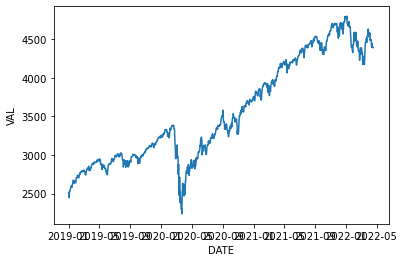

In [42]:
plt = sns.lineplot(data=date_df_filled, x='DATE', y='VAL')
plt.xticks(rotation=45)

plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

# sns.lineplot(data=may_flights, x="year", y="passengers")

In [44]:
date_df_filled

,VAL
DATE,
2019-01-01,NaN
2019-01-02,2510.03
2019-01-03,2447.89
2019-01-04,2531.94
2019-01-05,2531.94
...,...
2022-04-14,4392.59
2022-04-15,4392.59
2022-04-16,4392.59


In [48]:
date_df_filled.rename(columns={"VAL": "SP_INDEX"}, inplace=True)


In [49]:
date_df_filled.to_csv('../data/processed/snp_filled.csv')